# Importing library

In [51]:
import pandas as pd

# Load the DataSet

In [52]:
df=pd.read_csv("life_insurance_data.csv")
df

,ClaimID,Age,AnnualIncome,PolicyType,ClaimAmount,Hobbies,Fraudulent
0,1,56,92292,Premium,2549,Sports,1
1,2,69,53833,Premium,10956,Cooking,0
2,3,46,34158,Premium,7140,Traveling,1
3,4,32,92680,Basic,11837,Gardening,1
4,5,60,50309,Basic,4716,Traveling,0
...,...,...,...,...,...,...,...
995,996,18,56385,Basic,9244,Reading,0
996,997,35,68158,Premium,15743,Cooking,0
997,998,49,53019,Premium,14333,Cooking,1
998,999,64,48639,Basic,14341,Sports,1


# Data Exploration

In [53]:
print(df.head())
print(df.describe())
print(df.info())
print(df['Fraudulent'].value_counts())
print(df['PolicyType'].value_counts())
print(df['Hobbies'].value_counts())

   ClaimID  Age  AnnualIncome PolicyType  ClaimAmount    Hobbies  Fraudulent
0        1   56         92292    Premium         2549     Sports           1
1        2   69         53833    Premium        10956    Cooking           0
2        3   46         34158    Premium         7140  Traveling           1
3        4   32         92680      Basic        11837  Gardening           1
4        5   60         50309      Basic         4716  Traveling           0
           ClaimID          Age  AnnualIncome   ClaimAmount   Fraudulent
count  1000.000000  1000.000000    1000.00000   1000.000000  1000.000000
mean    500.500000    49.857000   74175.69200  10617.982000     0.505000
std     288.819436    18.114267   26346.07204   5551.214643     0.500225
min       1.000000    18.000000   30055.00000   1016.000000     0.000000
25%     250.750000    35.000000   51496.75000   5942.250000     0.000000
50%     500.500000    50.000000   72972.50000  10813.000000     1.000000
75%     750.250000    66.00

# Data Visualization for Exploration

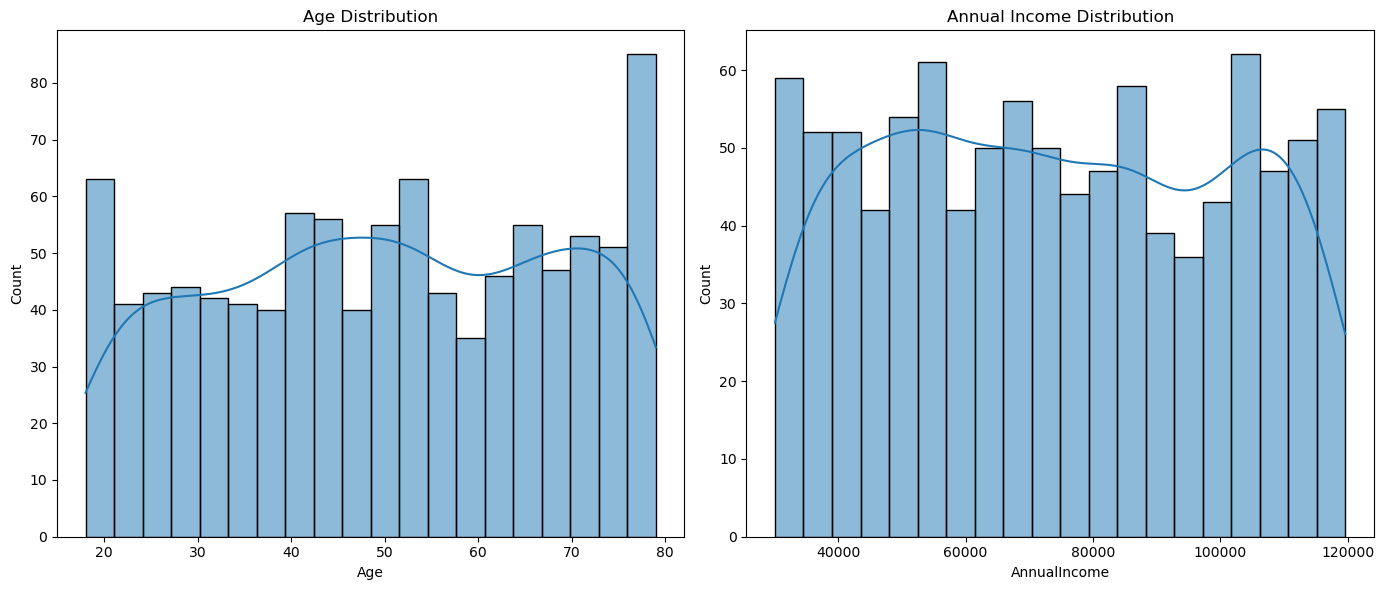

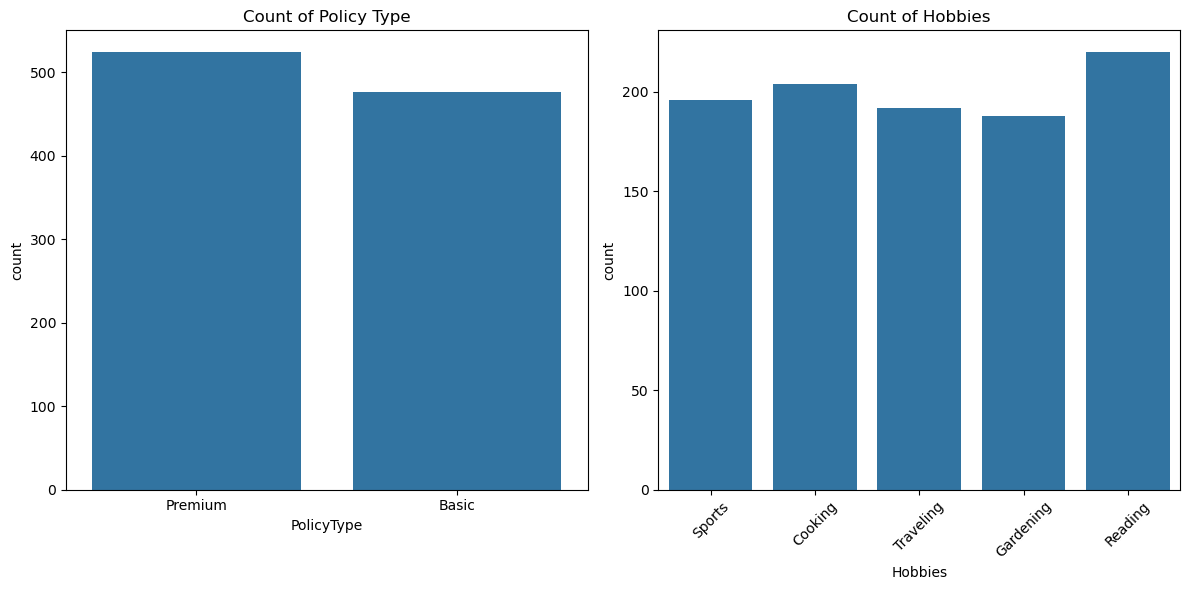

In [54]:

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution')

plt.subplot(1, 2, 2)
sns.histplot(df['AnnualIncome'], bins=20, kde=True)
plt.title('Annual Income Distribution')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='PolicyType')
plt.title('Count of Policy Type')

plt.subplot(1, 2, 2)
sns.countplot(data=df, x='Hobbies')
plt.title('Count of Hobbies')


plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Data Processing

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [56]:
label_encoder_policy = LabelEncoder()
df['PolicyType'] = label_encoder_policy.fit_transform(df['PolicyType'])

label_encoder_hobbies = LabelEncoder()
df['Hobbies'] = label_encoder_hobbies.fit_transform(df['Hobbies'])

In [57]:
X = df[['Age', 'AnnualIncome', 'PolicyType', 'Hobbies', 'ClaimAmount']]
y = df['Fraudulent']

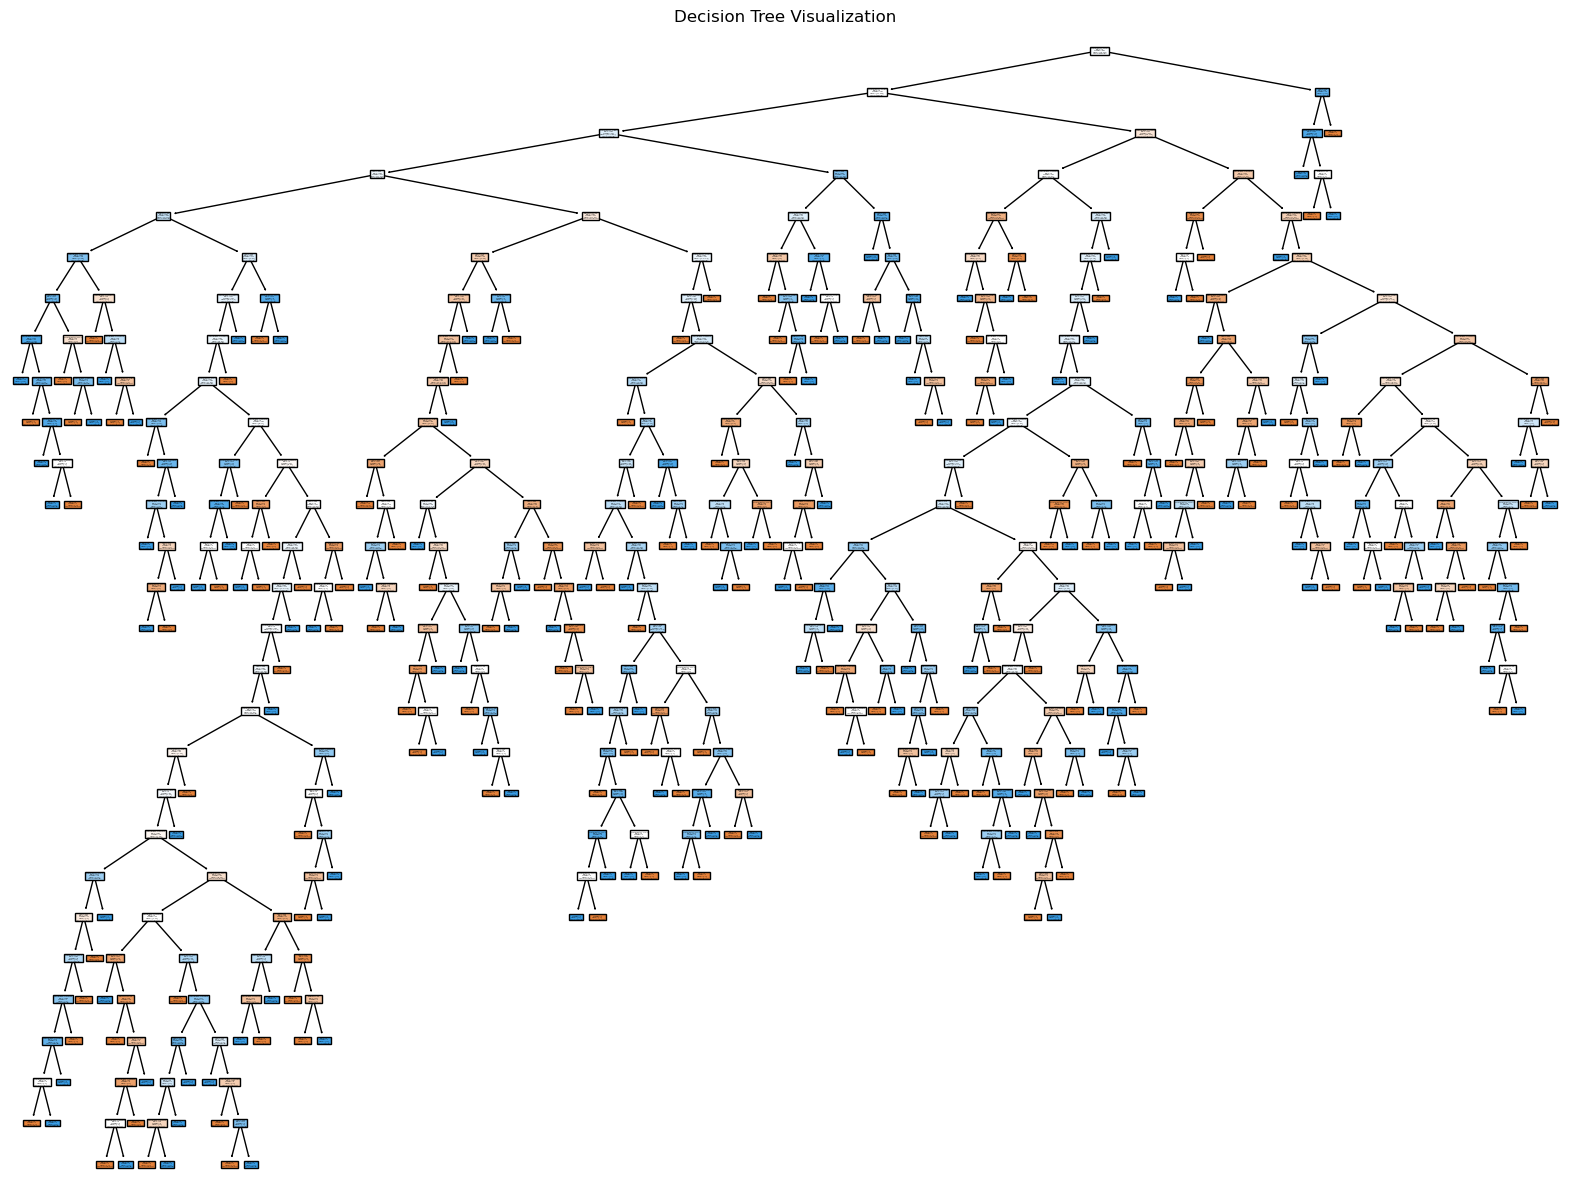

In [58]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 15))
plot_tree(model, feature_names=X.columns, class_names=['Not Fraudulent', 'Fraudulent'], filled=True)
plt.title('Decision Tree Visualization')
plt.show()

# Split data into training and test set

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating Decision Tree Model

In [60]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

# Measuring Error Rate

In [61]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.48
Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.46      0.47       102
           1       0.47      0.50      0.49        98

    accuracy                           0.48       200
   macro avg       0.48      0.48      0.48       200
weighted avg       0.48      0.48      0.48       200

Confusion Matrix:
[[47 55]
 [49 49]]


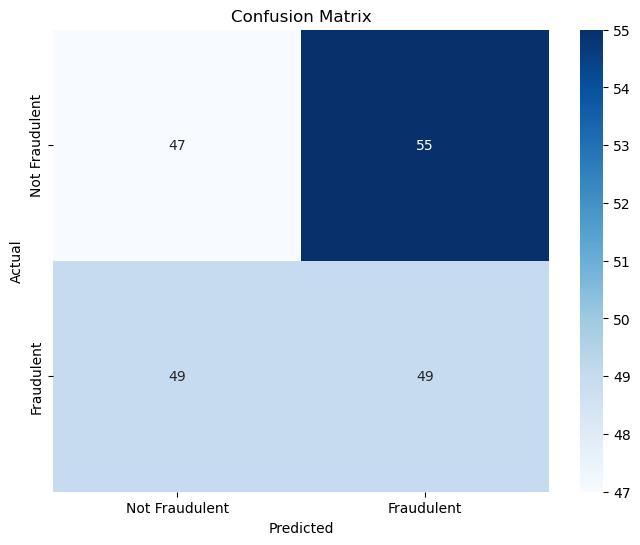

In [62]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraudulent', 'Fraudulent'], yticklabels=['Not Fraudulent', 'Fraudulent'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Model Tuning

In [63]:
tuned_model = DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42)
tuned_model.fit(X_train, y_train)
y_pred_tuned = tuned_model.predict(X_test)

# Evaluate the tuned model

In [64]:
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print(f'Tuned Accuracy: {accuracy_tuned:.2f}')
print('Tuned Classification Report:')
print(classification_report(y_test, y_pred_tuned))

Tuned Accuracy: 0.53
Tuned Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.40      0.47       102
           1       0.52      0.66      0.58        98

    accuracy                           0.53       200
   macro avg       0.53      0.53      0.52       200
weighted avg       0.54      0.53      0.52       200



# Zooming in on Prediction Data

In [65]:
df['PredictedFraudulent'] = tuned_model.predict(X)

total_predicted_fraud_amount = df[df['PredictedFraudulent'] == 1]['ClaimAmount'].sum()
print(f'Total Predicted Fraudulent Claim Amount: ${total_predicted_fraud_amount}')

Total Predicted Fraudulent Claim Amount: $6126886


In [66]:
fraud_by_hobbies = df[df['PredictedFraudulent'] == 1]['Hobbies'].value_counts()
print('Predicted Fraud Count by Hobbies:')
print(fraud_by_hobbies)

Predicted Fraud Count by Hobbies:
Hobbies
2    136
0    135
3    129
4    126
1    117
Name: count, dtype: int64


# Breakdown of predicted Fraud Count by Hobbies

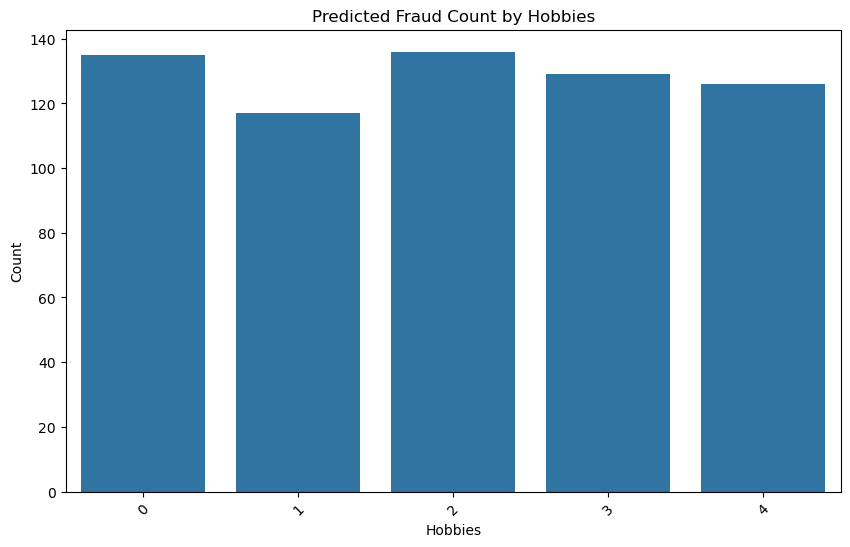

In [72]:
plt.figure(figsize=(10, 6))
sns.barplot(x=fraud_by_hobbies.index, y=fraud_by_hobbies.values)
plt.title('Predicted Fraud Count by Hobbies')
plt.xlabel('Hobbies')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


# Summary
***Data Exploration:*** *Understand your data with histograms, count plots, and statistical summaries.*

***Data Processing:*** *Prepare your data for modeling by encoding categorical variables and splitting datasets.*

***Creating Decision Tree Model:*** *Train a Decision Tree and visualize its structure.*

***Measuring Error Rate:*** *Evaluate performance using accuracy, classification reports, and confusion matrices.*

***Model Tuning:*** *Improve model performance and evaluate the tuned model.*

***Zooming in on Prediction Data:*** *Analyze the results and visualize predicted fraud cases.*

***These steps, combined with visualizations, help you understand your model’s performance and the underlying patterns in the data.***